1. Create a `data` folder in your local project repository.  

2. Download these two CSV files and place them in the data folder:

a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

 b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

2.	Create a `notebooks` folder and launch a Jupyter Notebook in the folder. Give it a meaningful name.  

**IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.

Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

3.	Import the required packages with their customary aliases:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 

Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


7662 rows x 4 columns

Data types:
- Country or Area: object
- Year: int64
- Value: float64
- Value Footnotes: float64

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
del gdp_df['Value Footnotes']

In [6]:
gdp_df.columns = ['country', 'year', 'GDP_per_capita']

In [7]:
gdp_df.head()

,country,year,GDP_per_capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data?

In [8]:
gdp_df["year"].nunique()

33

In [9]:
all_years_count = gdp_df["country"].value_counts().reset_index()
all_years_count.head()

,country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33


In [10]:
incomplete_years = all_years_count[all_years_count["count"]!= 33]
incomplete_years.head()

,country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32


In [11]:
incomplete_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 202 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  40 non-null     object
 1   count    40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


Look at the number of observations per year. What do you notice?

In [12]:
observations_per_year = gdp_df.groupby("year").agg("count")
print(observations_per_year)

      country  GDP_per_capita
year                         
1990      207             207
1991      208             208
1992      210             210
1993      211             211
1994      213             213
1995      223             223
1996      223             223
1997      226             226
1998      226             226
1999      227             227
2000      233             233
2001      234             234
2002      235             235
2003      235             235
2004      236             236
2005      236             236
2006      237             237
2007      237             237
2008      238             238
2009      239             239
2010      239             239
2011      240             240
2012      240             240
2013      242             242
2014      242             242
2015      242             242
2016      242             242
2017      242             242
2018      242             242
2019      242             242
2020      242             242
2021      

The observations per year increase steadily from 1990 to 2020 and then decrease in the two final years observed in the dataset.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [13]:
twenty_twenty = gdp_df[gdp_df["year"]==2020]
print(twenty_twenty)

                          country  year  GDP_per_capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


In [14]:
del twenty_twenty["year"]

In [15]:
twenty_twenty.head()

,country,GDP_per_capita
1,Afghanistan,1968.341002
22,Africa Eastern and Southern,3455.023119
55,Africa Western and Central,3957.933804
88,Albania,13278.369769
121,Algeria,10844.770764


Create a histogram, a density plot, a boxplot, and a violin plot. 

Text(0.5, 1.0, 'GDP Distribution in 2020')

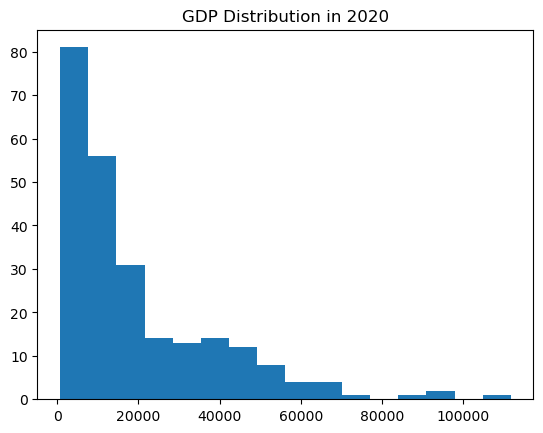

In [16]:
# histogram
x = twenty_twenty["GDP_per_capita"]
plt.hist(x, bins ="auto")
plt.title("GDP Distribution in 2020")

Text(0.5, 1.0, 'GDP Distribution in 2020')

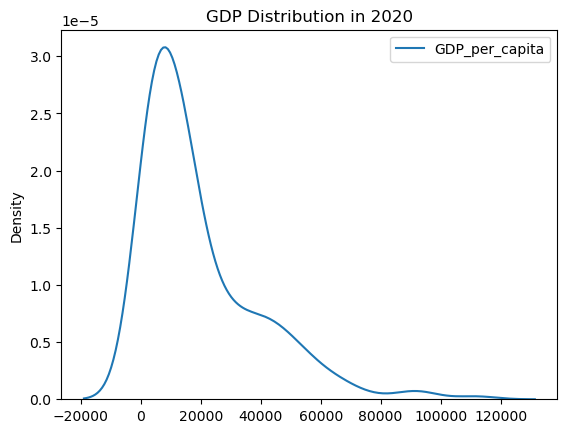

In [17]:
# density plot
sns.kdeplot(twenty_twenty)
plt.title("GDP Distribution in 2020")

[Text(0.5, 1.0, 'GDP Distribution in 2020')]

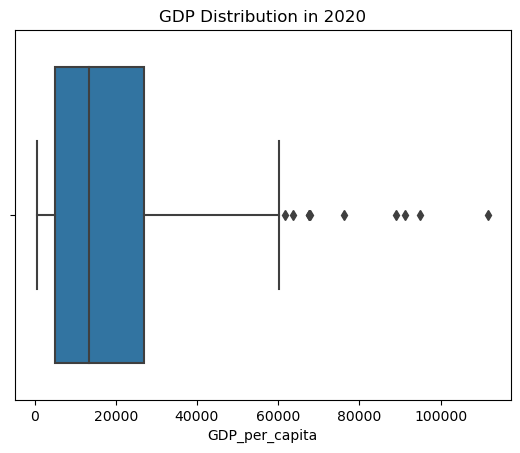

In [18]:
# box plot
sns.boxplot(data=twenty_twenty, x="GDP_per_capita").set(title="GDP Distribution in 2020")

[Text(0.5, 1.0, 'GDP Distribution in 2020')]

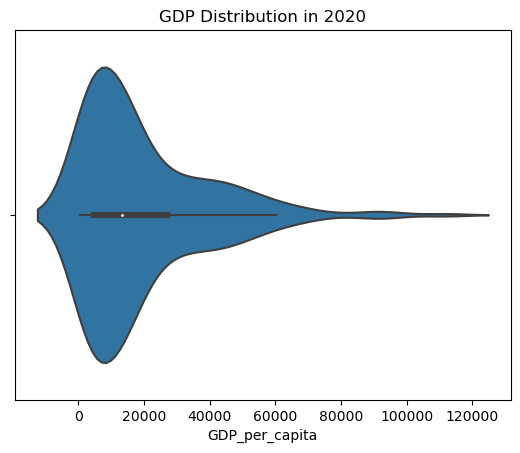

In [19]:
# violin plot
sns.violinplot(data=twenty_twenty, x="GDP_per_capita").set(title="GDP Distribution in 2020")

9. What was the median GDP per capita value in 2020?

In [20]:
twenty_twenty["GDP_per_capita"].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [21]:
gdp_decades = gdp_df[gdp_df['year'].isin([1990, 2000, 2010, 2020])]
gdp_decades.head()

,country,year,GDP_per_capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


[Text(0.5, 1.0, 'GDP per Capita by Decade')]

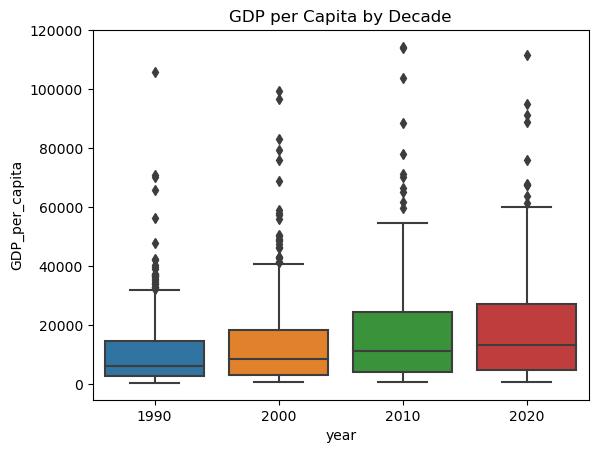

In [22]:
# boxplot
sns.boxplot(data=gdp_decades, x="year", y="GDP_per_capita").set(title="GDP per Capita by Decade")

[Text(0.5, 1.0, 'GDP per Capita by Decade')]

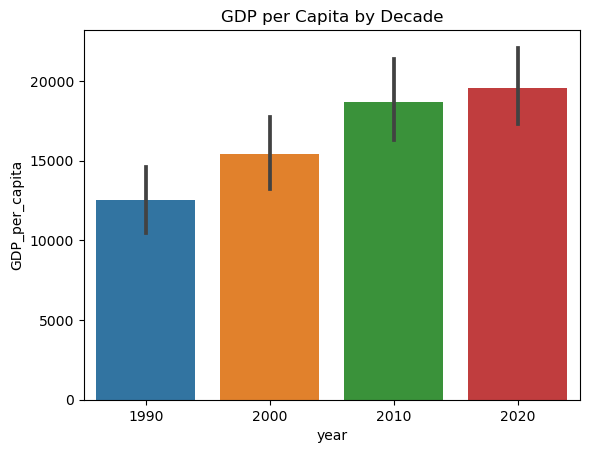

In [23]:
# barplot
sns.barplot(data=gdp_decades, x="year", y="GDP_per_capita").set(title="GDP per Capita by Decade")

[Text(0.5, 1.0, 'GDP per Capita by Decade')]

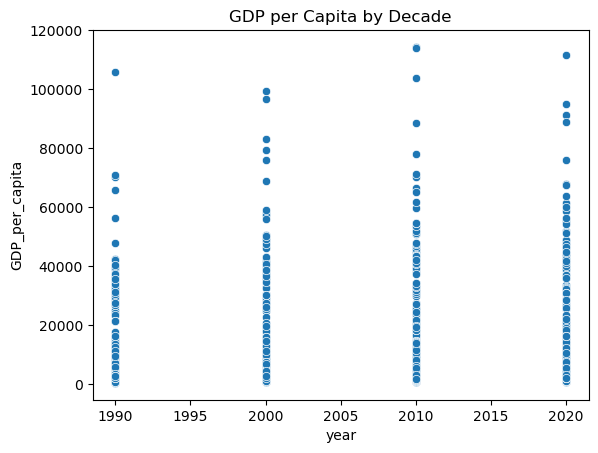

In [24]:
# scatterplot
sns.scatterplot(data=gdp_decades, x="year", y="GDP_per_capita").set(title="GDP per Capita by Decade")

[Text(0.5, 1.0, 'GDP per Capita by Decade')]

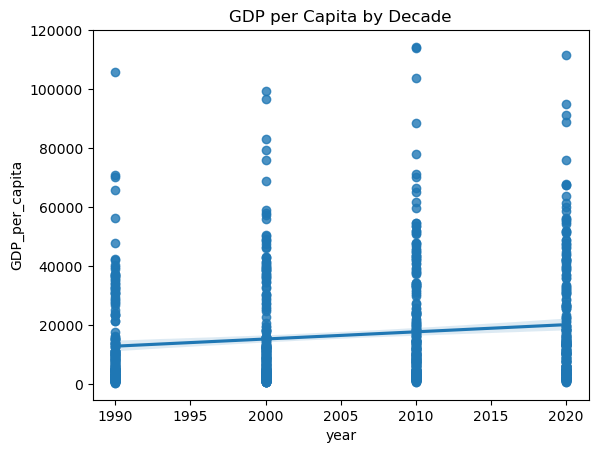

In [25]:
# scatterplot with trend line
sns.regplot(data=gdp_decades, x="year", y="GDP_per_capita").set(title="GDP per Capita by Decade")

What I observed in GDP values over time and the relative strengths/weaknesses of each type of plot.
Some outliers have remained consistently high, but over these four data points, the GDP per capita has steadily grown. In terms of strengths of each graph, we would need to consider more data points for a scatter plot to be effective. The boxplot and barplot seemed like they were used well in this context, because they looked cleaner and you could easily tell what the trend was at a glance.

11. Which country was the first to have a GDP per capita greater than $100,000?


In [26]:
gdp_df.head()

,country,year,GDP_per_capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [27]:
sorted_gdp = gdp_df.sort_values(by='GDP_per_capita')
greater_than_100k = sorted_gdp[sorted_gdp['GDP_per_capita'] > 100000].head(1)
print(greater_than_100k)

                   country  year  GDP_per_capita
7295  United Arab Emirates  1997   100956.706467


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [28]:
highest_gdp_2020 = twenty_twenty.sort_values(by = 'GDP_per_capita', ascending = False).head(1)
print(highest_gdp_2020)

         country  GDP_per_capita
4148  Luxembourg   111751.314751


Text(0.5, 1.0, 'Luxembourg GDP Over Time')

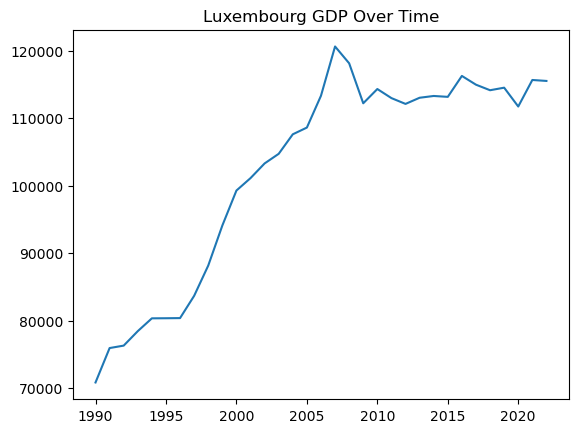

In [29]:
# answer is Luxembourg - create lineplot showing GDP over time
luxembourg_gdp = gdp_df[gdp_df['country'] == 'Luxembourg'].sort_values(['year'])
plt.plot(luxembourg_gdp.year, luxembourg_gdp.GDP_per_capita)
plt.title("Luxembourg GDP Over Time")

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [30]:
lowest_gdp_2020 = twenty_twenty.sort_values(by = 'GDP_per_capita', ascending = True).head(1)
print(lowest_gdp_2020)

     country  GDP_per_capita
973  Burundi      711.355263


Text(0.5, 1.0, 'Burundi GDP Over Time')

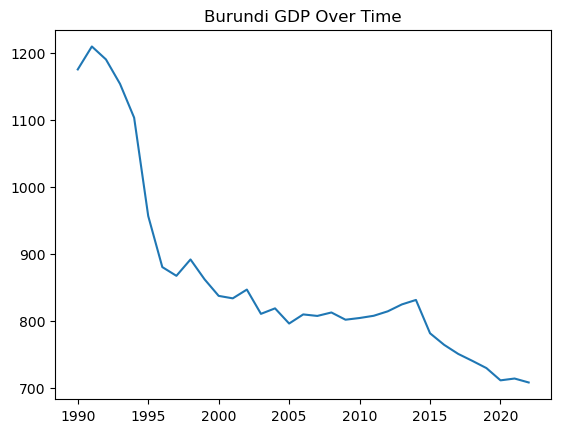

In [31]:
# answer is Burundi - create lineplot showing GDP over time
burundi_gdp = gdp_df[gdp_df['country'] == 'Burundi'].sort_values(['year'])
plt.plot(burundi_gdp.year, burundi_gdp.GDP_per_capita)
plt.title("Burundi GDP Over Time")

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [32]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines = 'skip')
print(internet_df)

     Country or Area                                               Year  \
0        Afghanistan                                               2014   
1        Afghanistan                                               2013   
2        Afghanistan                                               2012   
3        Afghanistan                                               2011   
4        Afghanistan                                               2010   
...              ...                                                ...   
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   
4672             178  Estimated based on Survey's results. Populatio...   
4673             179                     Preliminary. Country estimate.   
4674             180  The methodology used to estimated the figure f...   

         Value  Value Footnotes  
0     6.390000              NaN  
1     5.900000              NaN

In [33]:
data_type = internet_df.dtypes
print(data_type)

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object


In [34]:
internet_df['Year'] = pd.to_numeric(internet_df['Year'], errors='coerce').astype('Int64')
print(internet_df)

     Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...              ...   ...       ...              ...
4670             175  <NA>       NaN              NaN
4671             176  <NA>       NaN              NaN
4672             178  <NA>       NaN              NaN
4673             179  <NA>       NaN              NaN
4674             180  <NA>       NaN              NaN

[4675 rows x 4 columns]


In [35]:
#filter and drop all non-string countries
# \d stands for any digit from 0-9 - it checks the string to see if there is a digit there
# operating from assumption there should be NO digits in any of the countries
# .index returns only the index number
# planning to drop all rows bad_country returns
bad_country = internet_df[internet_df['Country or Area'].str.contains('\d', na=False)].index
cleaned_internet_df = internet_df.drop(bad_country)
print(cleaned_internet_df)


     Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...              ...   ...       ...              ...
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN
4495   footnoteSeqID  <NA>       NaN              NaN

[4496 rows x 4 columns]


In [36]:
cleaned_internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN
4495,footnoteSeqID,<NA>,NaN,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [37]:
del cleaned_internet_df['Value Footnotes']

In [38]:
cleaned_internet_df.columns = ['country','year','internet_users_pct']
cleaned_internet_df.head()

,country,year,internet_users_pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [80]:
clean_internet = cleaned_internet_df[cleaned_internet_df['country']!= 'footnoteSeqID']
clean_internet.tail()

,country,year,internet_users_pct
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


16. Look at the number of observations in this dataset per year. What do you notice?


In [82]:
observations_per_year = clean_internet['year'].value_counts()

[Text(0.5, 1.0, 'Observations by Year')]

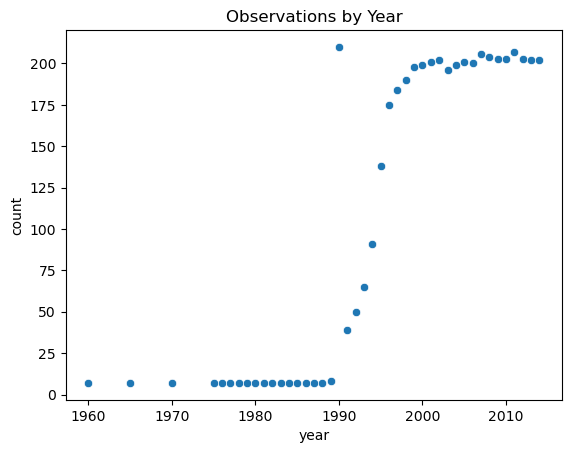

In [83]:
sns.scatterplot(observations_per_year).set(title="Observations by Year")

17. What is the first year to have a non-zero internet users percentage value?


In [84]:
sorted_internet_users = clean_internet.sort_values(by = 'internet_users_pct')
first_non_zero = sorted_internet_users[sorted_internet_users['internet_users_pct'] > 0].head(1)
print(first_non_zero)

       country  year  internet_users_pct
1318  Ethiopia  1995            0.000018


18. How does the distribution of internet users percent differ for 2000 and 2014?


In [85]:
net_distribution_df = clean_internet[clean_internet['year'].isin([2000,2014])]
print(net_distribution_df)

          country  year  internet_users_pct
0     Afghanistan  2014            6.390000
15        Albania  2014           60.100000
29        Albania  2000            0.114097
36        Algeria  2014           18.090000
50        Algeria  2000            0.491706
...           ...   ...                 ...
4445        Yemen  2000            0.082500
4451       Zambia  2014           17.340000
4465       Zambia  2000            0.191072
4473     Zimbabwe  2014           19.890000
4487     Zimbabwe  2000            0.401434

[401 rows x 3 columns]


[Text(0.5, 1.0, 'Percent Internet Users in 2000 and 2014')]

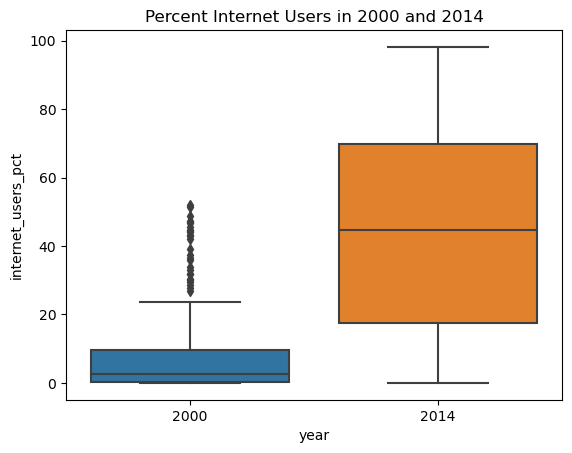

In [86]:
sns.boxplot(data=net_distribution_df, x='year', y='internet_users_pct').set(title='Percent Internet Users in 2000 and 2014')

19. For how many countries was the percentage of internet users below 5% in 2014?


In [87]:
internet_users_2014 = clean_internet[clean_internet['year'] == 2014]
below_5_pct_2014 = internet_users_2014[internet_users_2014['internet_users_pct'] < 5]
below_5_pct_2014['country'].count()

16

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [89]:
# will need to use to_numeric on the year column in internet_df in order to merge DataFrames
gdp_df_datatypes = gdp_df.dtypes
print(gdp_df_datatypes)

country            object
year                int64
GDP_per_capita    float64
dtype: object


In [88]:
clean_internet_datatypes = clean_internet.dtypes
print(clean_internet_datatypes)

country                object
year                    Int64
internet_users_pct    float64
dtype: object


In [94]:
# this was the method I originally used, but it may not have kept all rows as instructed:
# gdp_and_internet_use = pd.merge(gdp_df, clean_internet,  how='left', left_on=['country','year'], right_on = ['country','year'])

In [97]:
# using an outer join method now
pd.merge(gdp_df, clean_internet, on = ['country', 'year'], how = 'outer')

,country,year,GDP_per_capita,internet_users_pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


In [99]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             7662 non-null   object 
 1   year                7662 non-null   int64  
 2   GDP_per_capita      7662 non-null   float64
 3   internet_users_pct  3421 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [103]:
data_2014_sorted = gdp_and_internet_use[gdp_and_internet_use['year'] == 2014].sort_values(by = 'internet_users_pct', ascending = False)
highest_internet_2014 = data_2014_sorted.head(3)
print(highest_internet_2014)

      country  year  GDP_per_capita  internet_users_pct
2993  Iceland  2014    50450.741612               98.16
687   Bermuda  2014    77361.104881               96.80
5212   Norway  2014    62838.515727               96.30


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [104]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['year'] == 2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


[Text(0.5, 1.0, 'Internet Use and GDP in 2014')]

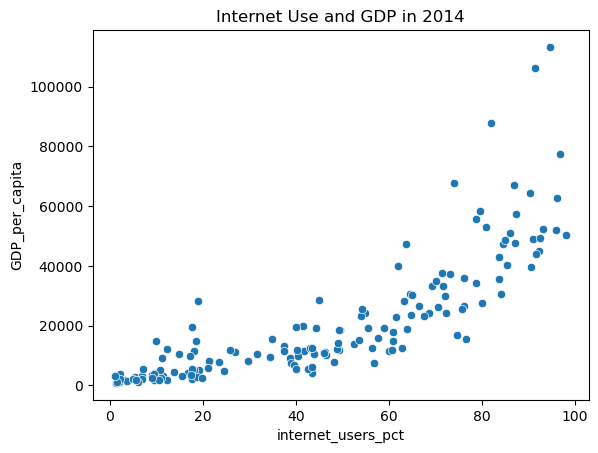

In [107]:
sns.scatterplot(data=gdp_and_internet_use_2014, x='internet_users_pct', y='GDP_per_capita').set(title='Internet Use and GDP in 2014')

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?


### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.